In [56]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving irisflower.zip to irisflower (2).zip


In [130]:
import zipfile
import io

with zipfile.ZipFile(io.BytesIO(uploaded['irisflower (2).zip']), 'r') as z:
    z.extractall()

import pandas as pd
data = pd.read_csv('IRIS.csv')


In [131]:
print(data['species'].value_counts()) #shows the different species with their count
print(data.iloc[0].shape) # 5 columns out of which 1 is just the species


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
(5,)


In [132]:
#checking that the data is in the correct format
print(data.dtypes)

data.isnull().sum()


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [144]:
#Making the feature matrix
X=data.drop('species',axis=1)
#Adding the X0=1 column

X_final=np.c_[np.ones((X.shape[0],1)),X]

alpha=0.01 #Learning rate alpha
epochs=1000 # number of iterations

#Mapping different labels into a matrix 'y'

label_map={
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
a=data['species'].map(label_map)
y=np.zeros((X_final.shape[0],3))
y[np.arange(X_final.shape[0]),a]=1

#theta initialisation at 0
theta=np.zeros((X_final.shape[1],3))
for epoch in range(epochs):
  logits=X_final@theta
  expon=np.exp(logits-np.max(logits,axis=1,keepdims=True)) ## stabilising logits to avoid overflow when introduced into exponent function (also keeping dimensions intact)
  softmax=expon/np.sum(expon,axis=1,keepdims=True)
  gradient=X_final.T@(softmax-y)
  gradient=gradient/X_final.shape[0]
  theta=theta-alpha*gradient



array([[ 0.16848743,  0.08467167, -0.2531591 ],
       [ 0.32202694,  0.17456566, -0.4965926 ],
       [ 0.8288372 , -0.27190856, -0.55692864],
       [-1.19809798,  0.18832046,  1.00977752],
       [-0.55255654, -0.17043636,  0.72299289]])

In [145]:
from sklearn.metrics import accuracy_score

preds = np.argmax(X_final @ theta, axis=1)
print("Training Accuracy:", accuracy_score(a, preds))


Training Accuracy: 0.9666666666666667


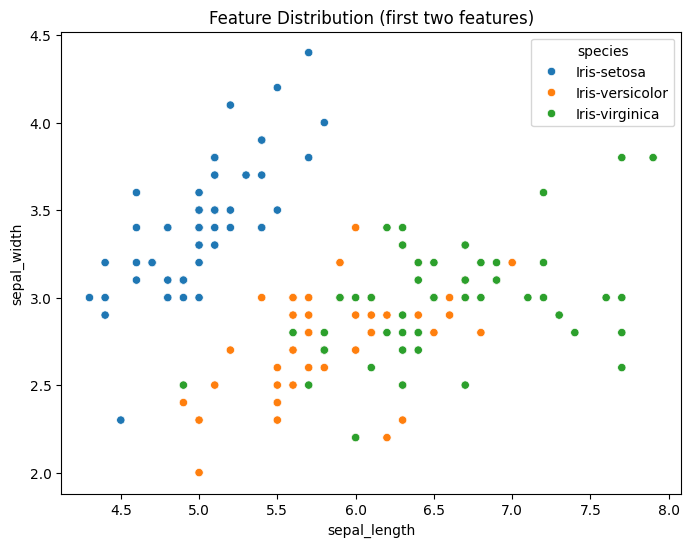

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=data['species'])
plt.title("Feature Distribution (first two features)")
plt.show()
